In [1]:
%matplotlib inline

In [2]:
# Add the util directory to the path
import sys
import os
sys.path.append(os.path.abspath('../util'))

In [3]:
from imp import reload
from operator import itemgetter
from collections import Counter
from itertools import chain

from matplotlib import pyplot as plt
from numpy import histogram

import get_trends as gt
import util
import twitter as tw

/home/simone/.virtualenvs/twitter/lib/python3.4/site-packages/cassandra/util.py:486: UserWarning: The blist library is not available, so a pure python list-based set will be used in place of blist.sortedset for set collection values. You can find the blist library here: https://pypi.python.org/pypi/blist/
  "The blist library is not available, so a pure python list-based set will "


In [4]:
# Get all records from the DB, make sure your C* cluster is running!
cluster = gt.TwitterCassandraConnector()
cluster.connect(['127.0.0.1'])
cursor = cluster.read()

tweets = []

for item in cursor:
    tweets.append(item)
    
cluster.close()

In [5]:
ten_min = util.group(tweets, itemgetter('creation_minute'))
for t in ten_min:
    res = ten_min[t]
    break
res??

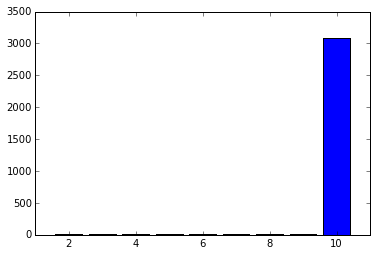

In [6]:
tweet_count = Counter([len(ten_min[trends]) for trends in ten_min])
tweet_count = [(key, tweet_count[key]) for key in tweet_count]
tweet_count?
tweet_count = list(zip(*tweet_count))
plt.bar(tweet_count[0], tweet_count[1], align="center")
plt.savefig('group_content.png')
plt.show()

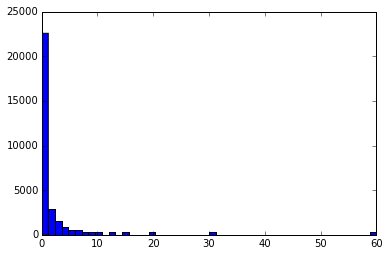

In [9]:
tweet_vel = []
for minute in ten_min:
    tweet_vel.append(map(tw.get_velocity, ten_min[minute]))

tweet_vel = list(chain(*tweet_vel))

plt.hist(tweet_vel, bins=50)
plt.savefig('vel_dist.png')
plt.show()

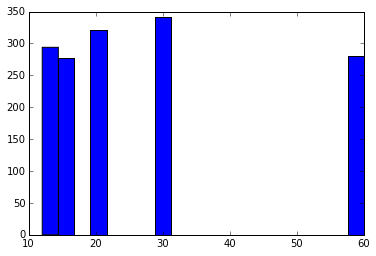

In [10]:
tweet_vel_filt = [vel for vel in tweet_vel if vel > 10]
plt.hist(tweet_vel_filt, bins=20)
plt.savefig('vel_dist_zoom.png')
plt.show()

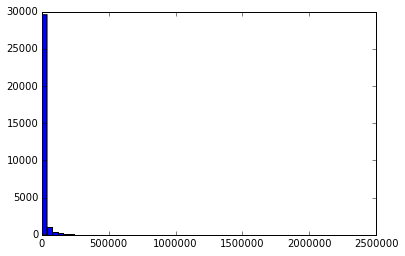

In [11]:
retweets = []
for minute in ten_min:
    retweets.append(map(itemgetter('total_retweets'), ten_min[minute]))
    
retweets = list(chain(*retweets))

plt.hist(retweets, bins=50)
plt.savefig('retweets.png')
plt.show()

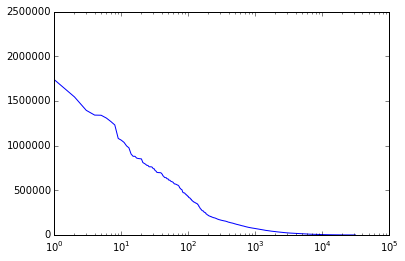

In [13]:
retweets.sort(reverse=True)
plt.plot(retweets)
plt.xscale('log')
plt.savefig('retweets_log.png')
plt.show()